# Wielkoskalowe metody pomiarowe w biologii molekularnej
## Metody selekcji cech - 2. Selekcja genów lub białek o ekspresji różnicującej dwie grupy próbek przy użyciu metody Recursive Feature Elimination
### Bartosz Sowul, Katarzyna Szmulewicz

# test: instalacja potrzebnych modułów

In [4]:
%matplotlib inline
#!pip install pathos
#!pip install tqdm
#!pip install matplotlib
#!pip install pandas
#!pip install numexpr
#!pip install numpy
#!pip install scikit_learn

test: ładowanie potrzebnych modułów

In [8]:
import pandas as pd

## implementacja funkcji Recursive Feature Elimination

In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

def recursive_feature_elimination(clf=SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')):
    pass

## Ładowanie danych

In [88]:
def load_data(dataset):
    df = pd.read_csv(dataset, sep='\t')
    df = df.transpose()
    return df

df = load_data('./data/Leukemia/Leukemia.txt')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
#Leukemia,#ALL B-cell#ALL T-cell#AML,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
ALLB 01,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
ALLB 04,1,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
ALLB 05,1,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
ALLB 07,1,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42


In [21]:
df.iloc[1:].head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
ALLB 01,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
ALLB 04,1,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
ALLB 05,1,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
ALLB 07,1,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42
ALLB 08,1,-413,-260,7,-2,-541,-790,-275,-463,70,...,289,629,-86,302,23,1799,446,59,781,20


In [43]:
df.rename(columns={0: 'class'}, inplace=True)
df.iloc[1:].describe()

,class,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
count,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
unique,3.0,66.0,64.0,65.0,68.0,69.0,65.0,70.0,67.0,59.0,...,61.0,71.0,64.0,67.0,62.0,72.0,64.0,53.0,67.0,56.0
top,1.0,-62.0,-114.0,-50.0,132.0,-191.0,-284.0,-31.0,-141.0,-6.0,...,103.0,690.0,57.0,201.0,-62.0,893.0,208.0,0.0,333.0,-41.0
freq,38.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,...,3.0,2.0,3.0,2.0,2.0,1.0,3.0,5.0,2.0,3.0


In [44]:
df.iloc[1:][df.columns.difference(['class'])].head()

,1,2,3,4,5,6,7,8,9,10,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
ALLB 01,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
ALLB 04,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
ALLB 05,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
ALLB 07,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
ALLB 08,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20


In [49]:
df1 = df.iloc[1:]
df1.head()

,class,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
ALLB 01,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
ALLB 04,1,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
ALLB 05,1,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
ALLB 07,1,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42
ALLB 08,1,-413,-260,7,-2,-541,-790,-275,-463,70,...,289,629,-86,302,23,1799,446,59,781,20


In [50]:
df1['class'].describe()

count     72.0
unique     3.0
top        1.0
freq      38.0
Name: class, dtype: float64

In [51]:
counts = df.iloc[1:, 0].value_counts()
counts

1.0    38
3.0    25
2.0     9
Name: class, dtype: int64

In [64]:
counts.idxmin()

2.0

In [65]:
counts[counts.idxmin()]

9

In [66]:
counts[counts > min(counts)]

1.0    38
3.0    25
Name: class, dtype: int64

In [68]:
df1['class'][df1['class'] != counts.idxmin()].describe()

count     63.0
unique     2.0
top        1.0
freq      38.0
Name: class, dtype: float64

In [69]:
df1['class'][df1['class'] != counts.idxmin()].value_counts()

1.0    38
3.0    25
Name: class, dtype: int64

In [73]:
df1[df1['class'] != counts.idxmin()].describe()

,class,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
count,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
unique,2.0,58.0,56.0,57.0,60.0,60.0,58.0,61.0,58.0,54.0,...,54.0,62.0,57.0,59.0,54.0,63.0,57.0,48.0,59.0,52.0
top,1.0,-62.0,-114.0,-50.0,132.0,-191.0,-284.0,-222.0,-141.0,-6.0,...,103.0,690.0,57.0,201.0,-62.0,893.0,342.0,0.0,74.0,-2.0
freq,38.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,...,3.0,2.0,3.0,2.0,2.0,1.0,2.0,5.0,2.0,2.0


In [74]:
df.isnull().values.any()

count     7130.0
unique    2373.0
top          8.0
freq        23.0
Name: ALLB 01, dtype: float64

In [78]:
df2 = df1[df1['class'] != counts.idxmin()]
df2.describe()

,class,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
count,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
unique,2.0,58.0,56.0,57.0,60.0,60.0,58.0,61.0,58.0,54.0,...,54.0,62.0,57.0,59.0,54.0,63.0,57.0,48.0,59.0,52.0
top,1.0,-62.0,-114.0,-50.0,132.0,-191.0,-284.0,-222.0,-141.0,-6.0,...,103.0,690.0,57.0,201.0,-62.0,893.0,342.0,0.0,74.0,-2.0
freq,38.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,...,3.0,2.0,3.0,2.0,2.0,1.0,2.0,5.0,2.0,2.0


In [79]:
df2.head()

,class,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
ALLB 01,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
ALLB 04,1,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
ALLB 05,1,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
ALLB 07,1,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42
ALLB 08,1,-413,-260,7,-2,-541,-790,-275,-463,70,...,289,629,-86,302,23,1799,446,59,781,20


In [89]:
df2 = df2.apply(pd.to_numeric)
df2.dtypes

class    float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
19       float64
20       float64
21       float64
22       float64
23       float64
24       float64
25       float64
26       float64
27       float64
28       float64
29       float64
          ...   
7100     float64
7101     float64
7102     float64
7103     float64
7104     float64
7105     float64
7106     float64
7107     float64
7108     float64
7109     float64
7110     float64
7111     float64
7112     float64
7113     float64
7114     float64
7115     float64
7116     float64
7117     float64
7118     float64
7119     float64
7120     float64
7121     float64
7122     float64
7123     float64
7124     float64
7125     float64
7126     float64
7127     float

## TEST

Fitting estimator with 7130 features.
Fitting estimator with 7129 features.
Fitting estimator with 7128 features.
Fitting estimator with 7127 features.
Fitting estimator with 7126 features.
Fitting estimator with 7125 features.
Fitting estimator with 7124 features.
Fitting estimator with 7123 features.
Fitting estimator with 7122 features.
Fitting estimator with 7121 features.
Fitting estimator with 7120 features.
Fitting estimator with 7119 features.
Fitting estimator with 7118 features.
Fitting estimator with 7117 features.
Fitting estimator with 7116 features.
Fitting estimator with 7115 features.
Fitting estimator with 7114 features.
Fitting estimator with 7113 features.
Fitting estimator with 7112 features.
Fitting estimator with 7111 features.
Fitting estimator with 7110 features.
Fitting estimator with 7109 features.
Fitting estimator with 7108 features.
Fitting estimator with 7107 features.
Fitting estimator with 7106 features.
Fitting estimator with 7105 features.
Fitting esti

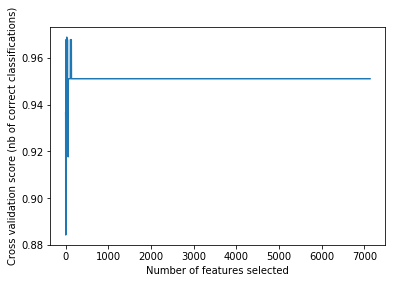

In [92]:
from time import time

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy', verbose=1)
start = time()
#rfecv.fit(X, y)
rfecv.fit(df2.iloc[1:][df2.columns.difference([0])], df2.iloc[1:, 0])
print(f'\nRFECV trwało {time() - start:.2f} sekund.')

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

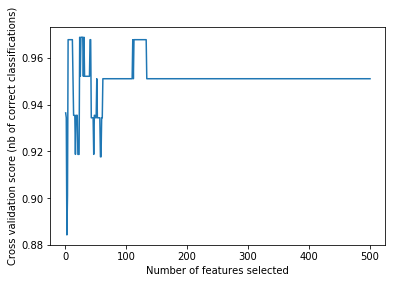

In [96]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_[:500]) + 1), rfecv.grid_scores_[:500])
plt.show()

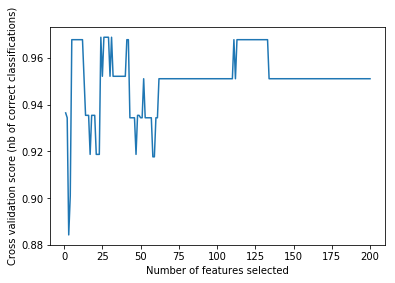

In [94]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_[:200]) + 1), rfecv.grid_scores_[:200])
plt.show()

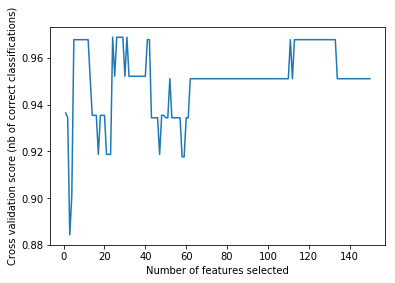

In [95]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_[:150]) + 1), rfecv.grid_scores_[:150])
plt.show()

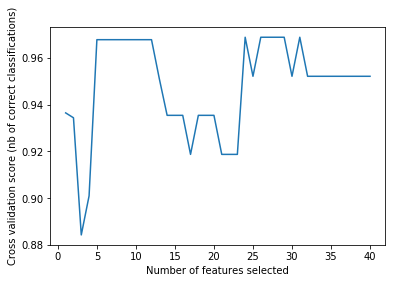

In [97]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_[:40]) + 1), rfecv.grid_scores_[:40])
plt.show()

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.